In [1]:
import pandas as pd
import numpy as np
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
file_path = '/Users/abbaszal/Documents/Thesis_Project_Spambase/data/spambase.data'  # Adjust the path as needed
df = pd.read_csv(file_path, header=None)

In [3]:
from Nash import find_nash_equilibria_v2
from Functions import compute_and_visualize_shapley_values

In [53]:
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Function to split data equally
def split_data_equal(X: np.ndarray, y: np.ndarray, n_clients: int, shuffle: bool=False, random_seed: int = None):
    if shuffle:
        if random_seed is not None:
            np.random.seed(random_seed)
        idx = np.random.permutation(X.shape[0])
        X = X[idx]
        y = y[idx]

    n_entries_per_client = X.shape[0] // n_clients
    partitions = []
    for i in range(n_clients):
        start = i * n_entries_per_client
        end = (i + 1) * n_entries_per_client
        X_i = X[start:end]
        y_i = y[start:end]
        partitions.append((X_i, y_i))
    # Ensure the last partition gets all remaining data.
    partitions[-1] = (X[start:], y[start:])

    return partitions

# Number of clients
n_clients = 10

random_seed = 42
np.random.seed(random_seed)
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split dataset
partitions = split_data_equal(X_train, y_train, n_clients, shuffle=False, random_seed=42)

# Directory to store the data
output_dir = "/Users/abbaszal/Documents/Thesis_Project_Spambase/data/forreport"
os.makedirs(output_dir, exist_ok=True)

# Save partitions in CSV format
for i, (X_i, y_i) in enumerate(partitions):

    df_client = pd.DataFrame(X_i)
    df_client["label"] = y_i  # Add labels as last column

    df_client.to_csv(os.path.join(output_dir, f"train_{i+1}.csv"), index=False)

print("Data has been successfully split and saved as CSV.")


Data has been successfully split and saved as CSV.


Label Distribution per Client:
       Client 1  Client 2  Client 3  Client 4  Client 5  Client 6  Client 7  \
label                                                                         
0      0.589674   0.63587   0.63587  0.619565   0.57337   0.57337  0.627717   
1      0.410326   0.36413   0.36413  0.380435   0.42663   0.42663  0.372283   

       Client 8  Client 9  Client 10  
label                                 
0      0.630435  0.627717   0.619565  
1      0.369565  0.372283   0.380435  


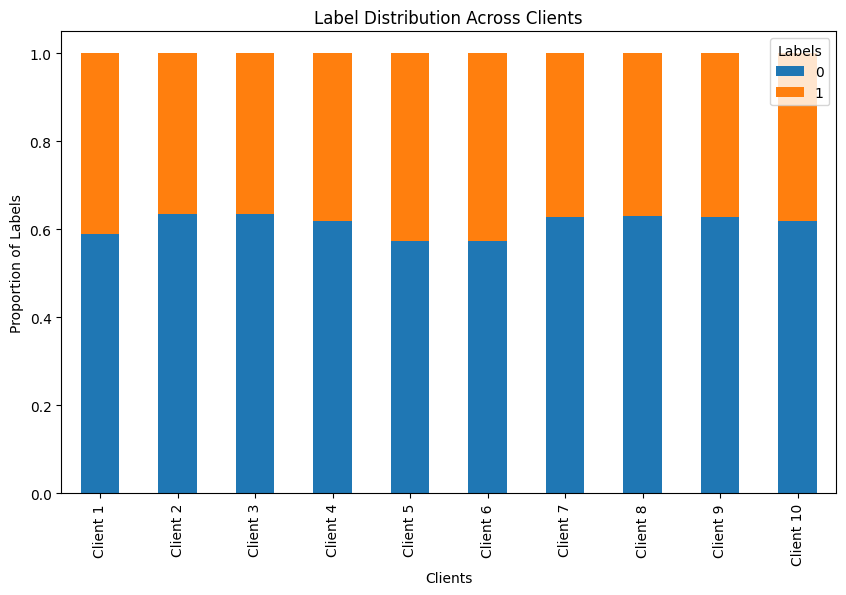

In [54]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Directory where the data is stored
output_dir = "/Users/abbaszal/Documents/Thesis_Project_Spambase/data/forreport"

# Number of clients
n_clients = 10

# Dictionary to store label distributions
label_distributions = {}

# Read each client's data and calculate label distribution
for i in range(1, n_clients + 1):
    file_path = os.path.join(output_dir, f"train_{i}.csv")
    df_client = pd.read_csv(file_path)
    
    # Count label occurrences
    label_counts = df_client["label"].value_counts(normalize=True)  # Normalize=True gives proportions
    label_distributions[f"Client {i}"] = label_counts

# Convert to DataFrame for better visualization
df_label_dist = pd.DataFrame(label_distributions).fillna(0)

# Display the label distribution DataFrame
print("Label Distribution per Client:")
print(df_label_dist)

# Plot the distribution
df_label_dist.T.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Label Distribution Across Clients")
plt.xlabel("Clients")
plt.ylabel("Proportion of Labels")
plt.legend(title="Labels")
plt.show()

Activity Distribution per Client:
              Client 1  Client 2  Client 3  Client 4  Client 5  Client 6  \
act                                                                        
Going down    0.140621  0.127267  0.167915  0.059355  0.157827  0.096044   
Going up      0.135847  0.111043  0.140690  0.076912  0.145358  0.079262   
Sitting       0.067446  0.088217  0.094353  0.067340  0.064358  0.047662   
Sitting down  0.024487  0.035904  0.020167  0.012602  0.011749  0.013234   
Standing      0.109881  0.136274  0.209882  0.319000  0.263764  0.256150   
Standing up   0.024869  0.033313  0.038798  0.023232  0.015346  0.014817   
Walking       0.496850  0.467983  0.328196  0.441558  0.341598  0.492831   

              Client 7  Client 8  Client 9  Client 10  
act                                                    
Going down    0.105372  0.113442  0.135165   0.149990  
Going up      0.092410  0.131674  0.170514   0.179564  
Sitting       0.079497  0.086963  0.074271   0.104014  
S

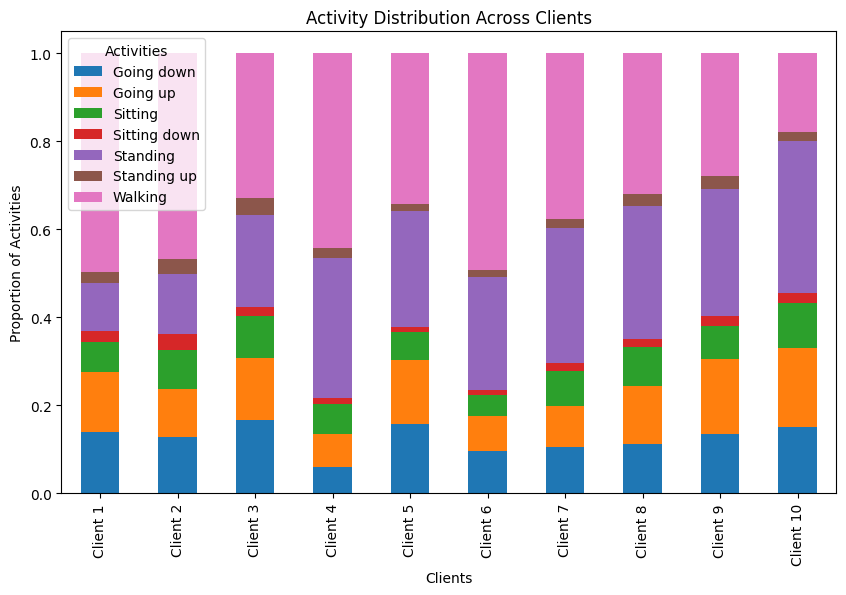

In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Directory where the new data is stored
new_output_dir = "/Users/abbaszal/Documents/Thesis_Project_Spambase/data/metadata"  # Change this to the correct path

# Number of clients
n_clients = 10  # Adjust if the number of clients is different

# Dictionary to store activity distributions
activity_distributions = {}

# Read each client's data and calculate activity distribution
for i in range(1, n_clients + 1):
    file_path = os.path.join(new_output_dir, f"train_{i:02d}.csv")
    
    if os.path.exists(file_path):  # Check if the file exists
        df_client = pd.read_csv(file_path)
        
        # Count activity occurrences
        act_counts = df_client["act"].value_counts(normalize=True)  # Normalize=True gives proportions
        activity_distributions[f"Client {i}"] = act_counts
    else:
        print(f"Warning: File {file_path} not found.")

# Convert to DataFrame for better visualization
df_activity_dist = pd.DataFrame(activity_distributions).fillna(0)

# Display the activity distribution DataFrame
print("Activity Distribution per Client:")
print(df_activity_dist)

# Plot the distribution
df_activity_dist.T.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Activity Distribution Across Clients")
plt.xlabel("Clients")
plt.ylabel("Proportion of Activities")
plt.legend(title="Activities")
plt.show()


In [47]:
import numpy as np
import os
import pandas as pd
from typing import Optional

# Define corruption function
def corrupt_data(X: np.ndarray, y: np.ndarray, corruption_prob: float = 0.8, nan_prob: float = 0.5, noise_std: Optional[float] = None):
    if noise_std is None:
        noise_std = 0.1
        
    X = X.copy()
    
    # Create a mask for corrupted samples
    mask = np.random.rand(X.shape[0]) < corruption_prob
    mask_nan = mask & (np.random.rand(X.shape[0]) < nan_prob)
    mask_noise = mask & (~mask_nan)

    # Add Gaussian noise
    X += mask_noise[:, None] * np.random.randn(X.shape[0], X.shape[1]) * noise_std
    X[np.argwhere(mask_nan)] = np.nan  # Replace some values with NaN
    
    return X, y


# Function to corrupt data for specific clients
def corrupt_clients(f, partitions, corrupt_client_indices, corruption_params):
    for idx in corrupt_client_indices:
        X_i, y_i = partitions[idx]
        X_i_corrupted, y_i_corrupted = f(X_i.copy(), y_i.copy(), **corruption_params)
        partitions[idx] = (X_i_corrupted, y_i_corrupted)
    
    return partitions


# Directories
input_directory = "/Users/abbaszal/Documents/Thesis_Project_Spambase/data/forreport"
base_output_directory = "/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport"

# Corruption parameters
noise_std_values = [0.1, 0.3, 0.5, 0.7, 1, 2]
corrupted_clients_counts = [3, 4, 6, 7, 8, 9]

# Load original partitions from CSV files
partitions = []
num_clients = 10

for i in range(1, num_clients + 1):
    df_client = pd.read_csv(os.path.join(input_directory, f"train_{i}.csv"))

    X_i = df_client.iloc[:, :-1].to_numpy()
    y_i = df_client.iloc[:, -1].to_numpy()

    partitions.append((X_i, y_i))

# Apply corruption for each noise level and client count
for noise in noise_std_values:
    for num_corrupt_clients in corrupted_clients_counts:
        corrupt_client_indices = np.random.choice(range(num_clients), num_corrupt_clients, replace=False)

        corruption_params = {
            'corruption_prob': 0.4,
            'nan_prob': 0.5,
            'noise_std': noise
        }

        # Create output directory
        output_directory = os.path.join(base_output_directory, f"noise_{noise}", f"c{num_corrupt_clients}")
        os.makedirs(output_directory, exist_ok=True)

        # Corrupt selected clients
        corrupted_partitions = corrupt_clients(corrupt_data, partitions.copy(), corrupt_client_indices, corruption_params)

        # Save corrupted data as CSV
        for i, (X_i, y_i) in enumerate(corrupted_partitions):
            df_client = pd.DataFrame(X_i)
            df_client["label"] = y_i  # Add labels as last column

            df_client.to_csv(os.path.join(output_directory, f"train_{i+1}.csv"), index=False)

        print(f"Corrupted data saved in '{output_directory}' for {num_corrupt_clients} clients with noise_std {noise}.")


Corrupted data saved in '/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport_2/noise_0.1/c3' for 3 clients with noise_std 0.1.
Corrupted data saved in '/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport_2/noise_0.1/c4' for 4 clients with noise_std 0.1.
Corrupted data saved in '/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport_2/noise_0.1/c6' for 6 clients with noise_std 0.1.
Corrupted data saved in '/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport_2/noise_0.1/c7' for 7 clients with noise_std 0.1.
Corrupted data saved in '/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport_2/noise_0.1/c8' for 8 clients with noise_std 0.1.
Corrupted data saved in '/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport_2/noise_0.1/c9' for 9 clients with noise_std 0.1.
Corrupted data saved in '/Users/abbaszal/Documents/Thesis_Project_Spam

In [4]:
# disable ConvergenceWarnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [5]:
import os
import random
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm



X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train_global, y_test_global = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_global_scaled = scaler.fit_transform(X_train)
X_test_global_scaled = scaler.transform(X_test)
##


# -------------------------------------------------------------------
def run_experiment_modified_for_saved_data(
    n_trials,
    n_clients,
    max_iters,
    noise_std,
    num_corrupted_clients,
    save_dir,
    subsample_ratios=[0.5],
    base_random_seed=42,
    data_root= "/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport"
):

    os.makedirs(save_dir, exist_ok=True)
    all_nash_details = []

    for subsample_ratio in subsample_ratios:

        for max_iter_val in max_iters:
            # Minimal logging for each setting (can be commented out if desired)
            # print(f"Running: noise_std={noise_std}, corrupted_clients={num_corrupted_clients}, subsample_ratio={subsample_ratio}, max_iter={max_iter_val}")
            nash_counts = Counter()
            details_for_this_setting = []

            for trial in range(n_trials):
                trial_seed = base_random_seed + trial + int(10 * max_iter_val)
                random.seed(trial_seed)
                np.random.seed(trial_seed)

                # Train one model per client.
                client_models = []
                client_global_accuracies = {}

                for client_idx in range(1, n_clients + 1):
                    train_path = os.path.join(
                        data_root,
                        f"noise_{noise_std}",
                        f"c{num_corrupted_clients}",
                        f"train_{client_idx}.csv"
                    )



                    df_train = pd.read_csv(train_path)
                    df_train = df_train.sample(frac=subsample_ratio, random_state=trial_seed).reset_index(drop=True)

                    # Drop rows where any feature (X) contains NaN
                    df_train = df_train.dropna() 
        
                
                    # Split features and labels
                    X_train = df_train.iloc[:, :-1].values  # Features (all columns except the last)
                    y_train = df_train.iloc[:, -1].values

                    model = LogisticRegression(random_state=trial_seed,
                                                max_iter=max_iter_val)
            
                    model.fit(X_train, y_train)

                    client_models.append(model)
                    if X_test_global_scaled is not None and y_test_global is not None:
                        acc_global = accuracy_score(y_test_global, model.predict(X_test_global_scaled))
                    else:
                        acc_global = 0.0
                    client_global_accuracies[client_idx - 1] = acc_global

                # Evaluate all possible coalitions (2^n - 1)
                def aggregate_lr_models(models: list):

                    aggregated_model = LogisticRegression(random_state=trial_seed)
                    aggregated_model.coef_ = np.mean([model.coef_ for model in models], axis=0)
                    aggregated_model.intercept_ = np.mean([model.intercept_ for model in models], axis=0)
                    aggregated_model.classes_ = models[0].classes_

                    return aggregated_model


                trial_results = []
                n_combinations = 2 ** n_clients

                for combo_idx in tqdm(range(1, n_combinations), desc=f"Evaluating coalitions for trial {trial+1}", disable=True):
                    bin_str = format(combo_idx, f'0{n_clients}b')
                    client_indices = [j for j in range(n_clients) if bin_str[n_clients - 1 - j] == '1']
                    if not client_indices:
                        continue

                    included_models = [client_models[j] for j in client_indices]
                    aggregated_model = aggregate_lr_models(included_models)
                    if X_test_global_scaled is not None and y_test_global is not None:
                        y_pred_global = aggregated_model.predict(X_test_global_scaled)
                        acc_global = accuracy_score(y_test_global, y_pred_global)
                    else:
                        acc_global = 0.0

                    row = {
                        'Trial': trial + 1,
                        'Combination': bin_str,
                        'Clients': [j + 1 for j in client_indices],
                        'Global Accuracy': acc_global
                    }
                    for j in range(n_clients):
                        row[f'Client {j + 1} Accuracy'] = client_global_accuracies[j]
                    trial_results.append(row)

                df_results = pd.DataFrame(trial_results)
                nash_df = find_nash_equilibria_v2(df_results)
                for coalition in nash_df['Combination']:
                    nash_counts[coalition] += 1

                nash_df['Trial'] = trial + 1
                nash_df['Noise Std'] = noise_std
                nash_df['Corrupted Clients'] = num_corrupted_clients
                nash_df['Subsample Ratio'] = subsample_ratio
                nash_df['Max Iter'] = max_iter_val
                details_for_this_setting.append(nash_df)

            df_details_this_setting = pd.concat(details_for_this_setting, ignore_index=True)
            all_nash_details.append(df_details_this_setting)

    final_details_df = pd.concat(all_nash_details, ignore_index=True)
    details_path = os.path.join(
        save_dir,
        f"Nash_Equilibrium_Details_noise_{noise_std}_c{num_corrupted_clients}.csv"
    )
    final_details_df.to_csv(details_path, index=False)
    # (Minimal logging: omit print here)

    return final_details_df

In [6]:
import os
import random
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# -------------------------------------------------------------------
def run_experiment_modified_for_saved_data(
    n_trials,
    n_clients,
    max_iters,
    noise_std,
    num_corrupted_clients,
    save_dir,
    subsample_ratios=[0.5],
    base_random_seed=42,
    data_root="/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport"
):
    os.makedirs(save_dir, exist_ok=True)
    all_nash_details = []

    for subsample_ratio in subsample_ratios:
        for max_iter_val in max_iters:
            nash_counts = Counter()
            details_for_this_setting = []

            for trial in range(n_trials):
                trial_seed = base_random_seed + trial + int(10 * max_iter_val)
                random.seed(trial_seed)
                np.random.seed(trial_seed)

                # Load full dataset
                X = df.iloc[:, :-1].to_numpy()
                y = df.iloc[:, -1].to_numpy()

                # Global dataset split (consistent across clients)
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=trial_seed)

                # Standardize based on training data
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)  # Ensure this remains fixed

                # Train one model per client
                client_models = []
                client_global_accuracies = {}

                for client_idx in range(1, n_clients + 1):
                    train_path = os.path.join(
                        data_root,
                        f"noise_{noise_std}",
                        f"c{num_corrupted_clients}",
                        f"train_{client_idx}.csv"
                    )

                    df_train = pd.read_csv(train_path)
                    df_train = df_train.sample(frac=subsample_ratio, random_state=trial_seed).reset_index(drop=True)
                    df_train = df_train.dropna()

                    X_client = df_train.iloc[:, :-1].values
                    y_client = df_train.iloc[:, -1].values

                    # Split client data: train (64%), validation (16%), test (20%)
                    X_train_temp, X_client_test, y_train_temp, y_client_test = train_test_split(
                        X_client, y_client, test_size=0.2, random_state=trial_seed
                    )
                    X_client_train, X_client_val, y_client_train, y_client_val = train_test_split(
                        X_train_temp, y_train_temp, test_size=0.2, random_state=trial_seed
                    )

                    # Initialize model with early stopping
                    model = LogisticRegression(random_state=trial_seed, max_iter=1, warm_start=True)
                    best_val_acc = 0
                    best_model = None
                    patience = 15
                    tol = 1e-4
                    no_improve_count = 0

                    for iter_count in range(max_iter_val):
                        model.fit(X_client_train, y_client_train)
                        val_acc = accuracy_score(y_client_val, model.predict(X_client_val))

                        if val_acc > best_val_acc + tol:
                            best_val_acc = val_acc
                            best_model = model
                            no_improve_count = 0
                        else:
                            no_improve_count += 1

                        if no_improve_count >= patience:
                            #print(f"Early stopping at iteration {iter_count} for client {client_idx}, best val acc: {best_val_acc:.4f}")
                            break

                    # Store best model
                    final_model = best_model if best_model else model
                    client_models.append(final_model)

                    # Test performance on consistent global test set
                    y_pred_test = final_model.predict(X_test_scaled)
                    acc_global = accuracy_score(y_test, y_pred_test)
                    client_global_accuracies[client_idx - 1] = acc_global

                # Function to aggregate models
                def aggregate_lr_models(models):
                    aggregated_model = LogisticRegression(random_state=trial_seed)
                    aggregated_model.coef_ = np.mean([model.coef_ for model in models], axis=0)
                    aggregated_model.intercept_ = np.mean([model.intercept_ for model in models], axis=0)
                    aggregated_model.classes_ = models[0].classes_
                    return aggregated_model

                trial_results = []
                n_combinations = 2 ** n_clients

                for combo_idx in tqdm(range(1, n_combinations), desc=f"Evaluating coalitions for trial {trial+1}", disable=True):
                    bin_str = format(combo_idx, f'0{n_clients}b')
                    client_indices = [j for j in range(n_clients) if bin_str[n_clients - 1 - j] == '1']
                    if not client_indices:
                        continue

                    included_models = [client_models[j] for j in client_indices]
                    aggregated_model = aggregate_lr_models(included_models)

                    # Global test set evaluation
                    y_pred_global = aggregated_model.predict(X_test_scaled)
                    
                    if len(y_pred_global) == len(y_test):  # Ensure length match
                        acc_global = accuracy_score(y_test, y_pred_global)
                    else:
                        print(f"Size mismatch: y_test={len(y_test)}, y_pred_global={len(y_pred_global)}")
                        acc_global = np.nan  # Handle errors gracefully

                    row = {
                        'Trial': trial + 1,
                        'Combination': bin_str,
                        'Clients': [j + 1 for j in client_indices],
                        'Global Accuracy': acc_global
                    }
                    for j in range(n_clients):
                        row[f'Client {j + 1} Accuracy'] = client_global_accuracies[j]
                    trial_results.append(row)

                df_results = pd.DataFrame(trial_results)
                nash_df = find_nash_equilibria_v2(df_results)
                for coalition in nash_df['Combination']:
                    nash_counts[coalition] += 1

                nash_df['Trial'] = trial + 1
                nash_df['Noise Std'] = noise_std
                nash_df['Corrupted Clients'] = num_corrupted_clients
                nash_df['Subsample Ratio'] = subsample_ratio
                nash_df['Max Iter'] = max_iter_val
                details_for_this_setting.append(nash_df)

            df_details_this_setting = pd.concat(details_for_this_setting, ignore_index=True)
            all_nash_details.append(df_details_this_setting)

    final_details_df = pd.concat(all_nash_details, ignore_index=True)
    details_path = os.path.join(
        save_dir,
        f"Nash_Equilibrium_Details_noise_{noise_std}_c{num_corrupted_clients}.csv"
    )
    final_details_df.to_csv(details_path, index=False)

    return final_details_df


/var/folders/hn/l1bxr6v97478sfly3rj76my40000gn/T/ipykernel_82488/1448266168.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(noise_std_values))


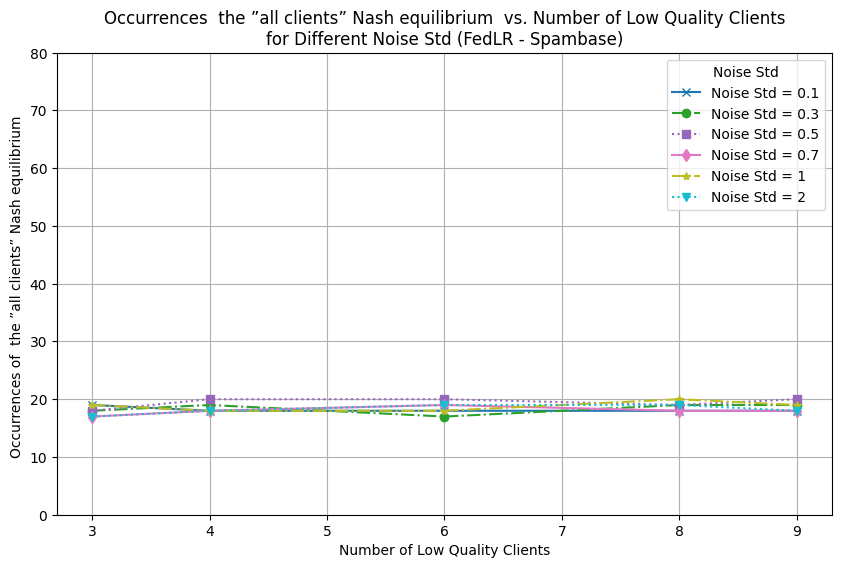

In [7]:


# -------------------------------------------------------------------
# Example usage across noise_std_values, corrupted_clients_counts, and subsample_ratios.
# -------------------------------------------------------------------
noise_std_values = [0.1, 0.3, 0.5, 0.7, 1, 2]
corrupted_clients_counts = [3, 4, 6, 8, 9]
subsample_ratios = [0.7,0.8]
n_trials = 10
n_clients = 10
max_iters = [10]
save_dir = "/Users/abbaszal/Documents/Thesis_Project_Spambase/experiment_results_forreport__2"

# Dictionary to store occurrences of '1111111111' for plotting.
results = {noise: [] for noise in noise_std_values}

for noise in noise_std_values:
    for cc in corrupted_clients_counts:
        final_details_df = run_experiment_modified_for_saved_data(
            n_trials=n_trials,
            n_clients=n_clients,
            max_iters=max_iters,
            noise_std=noise,
            num_corrupted_clients=cc,
            save_dir=save_dir,
            subsample_ratios=subsample_ratios,
            base_random_seed=42,
            data_root="/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport"
        )

        occurrence_count = (final_details_df['Combination'] == '1111111111').sum()
        results[noise].append(occurrence_count)
        # (Minimal logging: omit print here)

# -------------------------------------------------------------------
# Plot final aggregated results
# -------------------------------------------------------------------
corrupted_clients_counts = [3, 4, 6, 8, 9]
cmap = cm.get_cmap('tab10', len(noise_std_values))
markers = ['x', 'o', 's', 'd', '*', 'v', '^', '<', '>', 'h', 'D']
linestyles = ['-', '-.', ':']

plt.figure(figsize=(10, 6))
for i, noise in enumerate(noise_std_values):
    color = cmap(i)
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')

plt.xlabel("Number of Low Quality Clients")
plt.ylabel("Occurrences of  the ”all clients” Nash equilibrium ")
plt.legend(title="Noise Std")
plt.grid(True)
plt.ylim(0, 80)
plt.title("Occurrences  the ”all clients” Nash equilibrium  vs. Number of Low Quality Clients\nfor Different Noise Std (FedLR - Spambase)")
plt.show()

/var/folders/hn/l1bxr6v97478sfly3rj76my40000gn/T/ipykernel_82488/1695589147.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(noise_std_values))


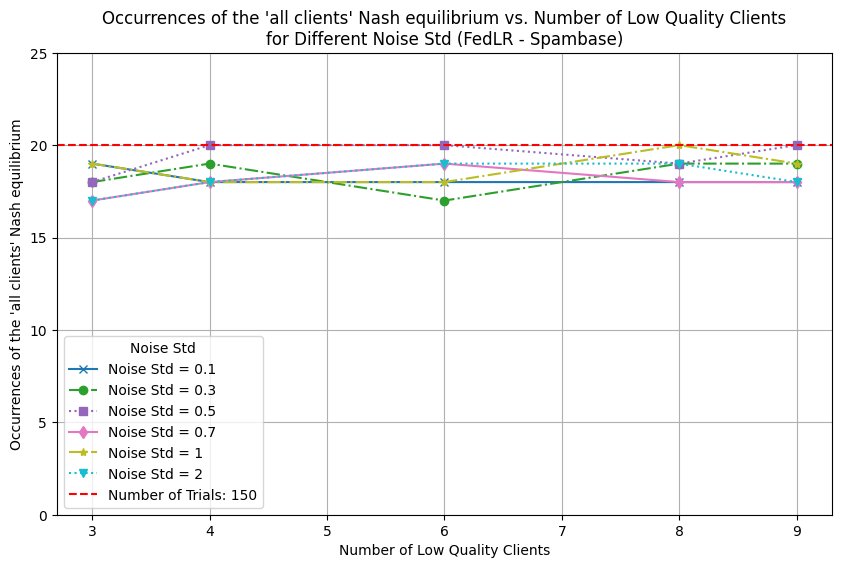

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

corrupted_clients_counts = [3, 4, 6, 8, 9]
cmap = cm.get_cmap('tab10', len(noise_std_values))
markers = ['x', 'o', 's', 'd', '*', 'v', '^', '<', '>', 'h', 'D']
linestyles = ['-', '-.', ':']

plt.figure(figsize=(10, 6))
for i, noise in enumerate(noise_std_values):
    color = cmap(i)
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')

# Add a dashed line at y=150 to indicate max trials
plt.axhline(y=20, linestyle='--', color='red', linewidth=1.5, label="Number of Trials: 150")

plt.xlabel("Number of Low Quality Clients")
plt.ylabel("Occurrences of the 'all clients' Nash equilibrium")
plt.legend(title="Noise Std")
plt.grid(True)
plt.ylim(0, 25)
plt.title("Occurrences of the 'all clients' Nash equilibrium vs. Number of Low Quality Clients\nfor Different Noise Std (FedLR - Spambase)")

plt.show()


## FedFor

In [1]:
import os
import math
import random
import argparse
import copy
import ast
from collections import Counter, defaultdict
from itertools import chain, combinations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from typing import Optional
import matplotlib.cm as cm


In [2]:
class DecisionTree:
    def __init__(self, max_depth=None, random_state=None):
        self.max_depth = max_depth
        self.tree_ = None
        self.random_state = random_state

    def fit(self, X, y):
        # Import here if not already imported: from sklearn.tree import DecisionTreeClassifier
        self.tree_ = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
        self.tree_.fit(X, y)

    def predict(self, X):
        return self.tree_.predict(X)
    

class FederatedForest:
    def __init__(self):
        self.models = []

    def add_model(self, model):
        self.models.append(model)

    def predict(self, X):
        # Each model makes a prediction and then a majority vote is taken across all models
        predictions = [model.predict(X) for model in self.models]
        predictions = np.array(predictions).T  # shape: (n_samples, n_models)
        y = [np.bincount(row).argmax() for row in predictions]
        return np.array(y)

In [3]:
from joblib import Parallel, delayed
from joblib import Parallel, delayed, parallel_backend

In [7]:
import os
import random
import warnings
from collections import Counter

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Make sure to import or define these in your script:
# from your_module import DecisionTree, FederatedForest, find_nash_equilibria_v2

def run_experiment_modified_for_saved_data(
    n_trials,
    n_clients,
    max_depths,  # This will now be used as max_depth values for the decision trees.
    noise_std,
    num_corrupted_clients,
    save_dir,
    subsample_ratios=[0.5],
    base_random_seed=42,
    data_root="/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport"
):
    os.makedirs(save_dir, exist_ok=True)
    all_nash_details = []

    for subsample_ratio in subsample_ratios:
        for max_depth_val in max_depths:
            # Track how often each coalition is found as a Nash equilibrium
            nash_counts = Counter()
            details_for_this_setting = []

            for trial in range(n_trials):
                # Set the trial seed
                trial_seed = base_random_seed + trial + int(1000 * max_depth_val)
                random.seed(trial_seed)
                np.random.seed(trial_seed)

                # Ignore specific warnings
                warnings.filterwarnings("ignore", message="X does not have valid feature names")

                # Load full dataset (Assuming df is defined earlier in your script)
                # Ensure that the global variable 'df' exists.
                X = df.iloc[:, :-1].to_numpy()
                y = df.iloc[:, -1].to_numpy()

                # Create a single global test set for this trial
                X_train, X_test, y_train_global, y_test_global = train_test_split(
                    X, y, test_size=0.2, random_state=trial_seed
                )
                scaler = StandardScaler()
                X_train_global_scaled = scaler.fit_transform(X_train)
                X_test_global_scaled = scaler.transform(X_test)

                # Process each client
                client_models = []
                client_global_accuracies = {}

                for client_idx in range(1, n_clients + 1):
                    train_path = os.path.join(
                        data_root,
                        f"noise_{noise_std}",
                        f"c{num_corrupted_clients}",
                        f"train_{client_idx}.csv"
                    )
                    df_train = pd.read_csv(train_path)
                    df_train = df_train.sample(frac=subsample_ratio, random_state=trial_seed).reset_index(drop=True)
                    df_train = df_train.dropna()  # Drop rows with NaN

                    X_train_client = df_train.iloc[:, :-1].values
                    y_train_client = df_train.iloc[:, -1].values

                    model = DecisionTree(max_depth=max_depth_val, random_state=trial_seed)
                    model.fit(X_train_client, y_train_client)

                    acc_global_ = accuracy_score(y_test_global, model.predict(X_test_global_scaled))
                    client_models.append(model)
                    client_global_accuracies[client_idx] = acc_global_

                # Aggregate results over all combinations of clients
                n_combinations = 2 ** n_clients
                trial_results = []

                for combo_idx in range(1, n_combinations):
                    bin_str = format(combo_idx, f'0{n_clients}b')
                    client_indices = [j for j in range(n_clients) if bin_str[n_clients - 1 - j] == '1']
                    if not client_indices:
                        continue

                    included_models = [client_models[j] for j in client_indices]
                    federated_model = FederatedForest()
                    for model in included_models:
                        federated_model.add_model(model)

                    y_pred_global = federated_model.predict(X_test_global_scaled)
                    acc_global = accuracy_score(y_test_global, y_pred_global)

                    row = {
                        'Trial': trial + 1,
                        'Combination': bin_str,
                        'Clients': [j + 1 for j in client_indices],
                        'Global Accuracy': acc_global
                    }
                    for j in range(n_clients):
                        row[f'Client {j + 1} Accuracy'] = client_global_accuracies[j + 1]
                    trial_results.append(row)

                df_results = pd.DataFrame(trial_results)

                ####################################
                # 3) Find Nash Equilibria
                ####################################
                nash_df = find_nash_equilibria_v2(df_results)

                # Record how often each combination is a Nash equilibrium
                for coalition in nash_df['Combination']:
                    nash_counts[coalition] += 1

                # Add additional info columns for the current trial
                nash_df['Trial'] = trial + 1
                nash_df['Noise Std'] = noise_std
                nash_df['Corrupted Clients'] = num_corrupted_clients
                nash_df['Subsample Ratio'] = subsample_ratio
                nash_df['Max Iter'] = max_depth_val
                details_for_this_setting.append(nash_df)

            print(f"{n_trials} trials for noise std={noise_std}, "
                  f"max_depth={max_depth_val}, subsample={subsample_ratio}, "
                  f"low_quality_clients={num_corrupted_clients} have completed.")

            df_details_this_setting = pd.concat(details_for_this_setting, ignore_index=True)
            all_nash_details.append(df_details_this_setting)

    final_details_df = pd.concat(all_nash_details, ignore_index=True)

    # Save final DataFrame as CSV
    details_path = os.path.join(
        save_dir,
        f"Nash_Equilibrium_Details_noise_{noise_std}_c{num_corrupted_clients}.csv"
    )
    final_details_df.to_csv(details_path, index=False)

    return final_details_df


In [ ]:
# Example usage

noise_std_values          = [0.1, 0.3, 0.5, 0.7, 1, 2]
corrupted_clients_counts  = [3, 4, 6, 8, 9]
subsample_ratios          = [0.7]
n_trials                  = 10
n_clients                 = 10
max_depths                 = [10, 20]
save_dir                  = "/Users/abbaszal/Documents/Thesis_Project_Spambase/experiment_results_forreport_2"

results = {noise: [] for noise in noise_std_values}

for noise in noise_std_values:
    for cc in corrupted_clients_counts:
        final_details_df = run_experiment_modified_for_saved_data(
            n_trials           = n_trials,
            n_clients          = n_clients,
            max_depths          = max_depths,
            noise_std          = noise,
            num_corrupted_clients = cc,
            save_dir           = save_dir,
            subsample_ratios   = subsample_ratios,
            base_random_seed   = 42,
            data_root          = "/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport"
        )

        # Count occurrences of the "1111111111" combination
        occurrence_count = (final_details_df['Combination'] == '1111111111').sum()
        results[noise].append(occurrence_count)


In [14]:
# Example usage

noise_std_values          = [0.1, 0.3, 0.5, 0.7, 1, 2]
corrupted_clients_counts  = [3, 4, 6, 8, 9]
subsample_ratios          = [0.7,0.8]
n_trials                  = 10
n_clients                 = 10
max_depths                 = [10, 20]
save_dir                  = "/Users/abbaszal/Documents/Thesis_Project_Spambase/experiment_results_forreport_2"

results = {noise: [] for noise in noise_std_values}

for noise in noise_std_values:
    for cc in corrupted_clients_counts:
        final_details_df = run_experiment_modified_for_saved_data(
            n_trials           = n_trials,
            n_clients          = n_clients,
            max_depths          = max_depths,
            noise_std          = noise,
            num_corrupted_clients = cc,
            save_dir           = save_dir,
            subsample_ratios   = subsample_ratios,
            base_random_seed   = 42,
            data_root          = "/Users/abbaszal/Documents/Thesis_Project_Spambase/data/corrupted_data_forreport"
        )

        # Count occurrences of the "1111111111" combination
        occurrence_count = (final_details_df['Combination'] == '1111111111').sum()
        results[noise].append(occurrence_count)


10 trials for noise std=0.1, max_depth=10, subsample=0.7, low_quality_clients=3 have completed.
10 trials for noise std=0.1, max_depth=20, subsample=0.7, low_quality_clients=3 have completed.
10 trials for noise std=0.1, max_depth=10, subsample=0.8, low_quality_clients=3 have completed.
10 trials for noise std=0.1, max_depth=20, subsample=0.8, low_quality_clients=3 have completed.
10 trials for noise std=0.1, max_depth=10, subsample=0.7, low_quality_clients=4 have completed.
10 trials for noise std=0.1, max_depth=20, subsample=0.7, low_quality_clients=4 have completed.
10 trials for noise std=0.1, max_depth=10, subsample=0.8, low_quality_clients=4 have completed.
10 trials for noise std=0.1, max_depth=20, subsample=0.8, low_quality_clients=4 have completed.
10 trials for noise std=0.1, max_depth=10, subsample=0.7, low_quality_clients=6 have completed.
10 trials for noise std=0.1, max_depth=20, subsample=0.7, low_quality_clients=6 have completed.
10 trials for noise std=0.1, max_depth=1

/var/folders/hn/l1bxr6v97478sfly3rj76my40000gn/T/ipykernel_79348/3498276580.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap       = cm.get_cmap('tab10', len(noise_std_values))


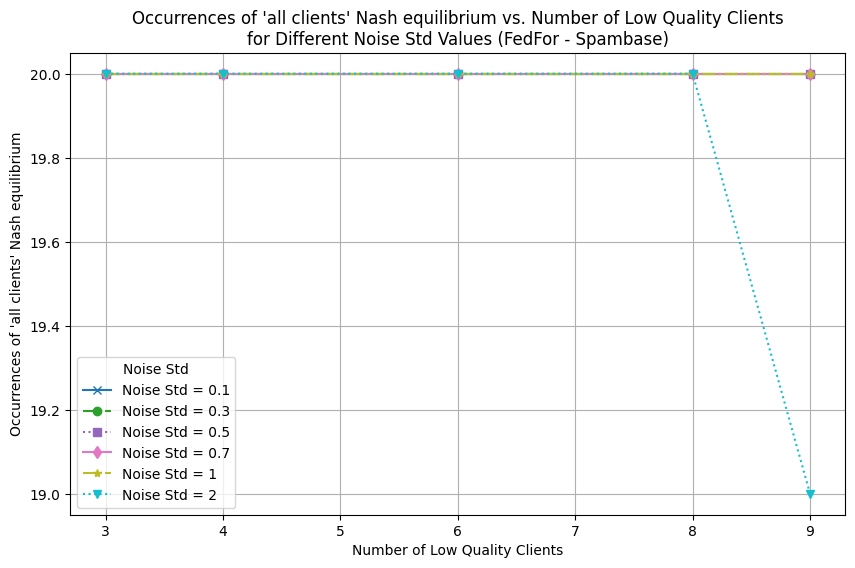

In [11]:
# Plot results

corrupted_clients_counts = [3, 4, 6, 8, 9]
cmap       = cm.get_cmap('tab10', len(noise_std_values))
markers    = ['x', 'o', 's', 'd', '*', 'v', '^', '<', '>', 'h', 'D']
linestyles = ['-', '-.', ':']

plt.figure(figsize=(10, 6))
for i, noise in enumerate(noise_std_values):
    color      = cmap(i)
    marker     = markers[i % len(markers)]
    linestyle  = linestyles[i % len(linestyles)]
    plt.plot(
        corrupted_clients_counts,
        results[noise],
        marker     = marker,
        linestyle  = linestyle,
        color      = color,
        label      = f'Noise Std = {noise}'
    )

plt.xlabel("Number of Low Quality Clients")
plt.ylabel("Occurrences of 'all clients' Nash equilibrium")
plt.legend(title="Noise Std")
plt.grid(True)
plt.title(
    "Occurrences of 'all clients' Nash equilibrium vs. Number of Low Quality Clients\n"
    "for Different Noise Std Values (FedFor - Spambase)"
)
plt.show()

/var/folders/hn/l1bxr6v97478sfly3rj76my40000gn/T/ipykernel_79348/3498276580.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap       = cm.get_cmap('tab10', len(noise_std_values))


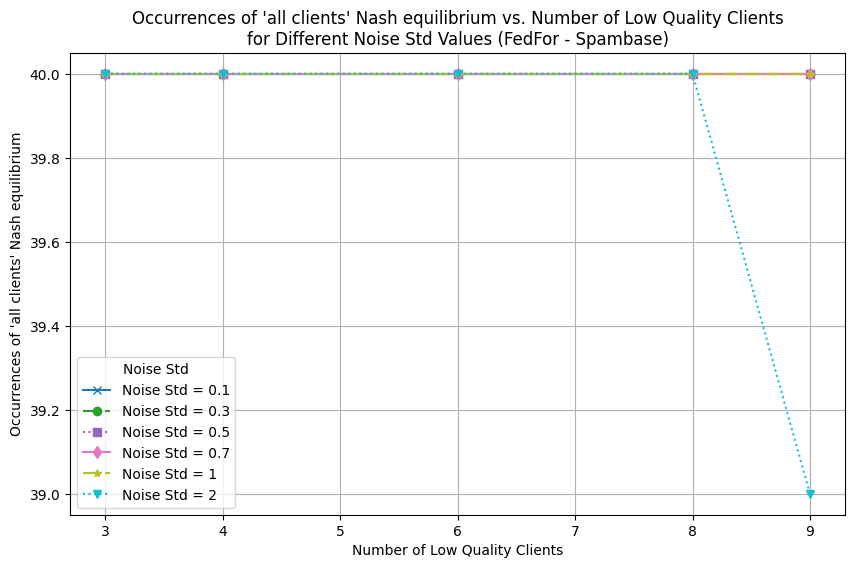

In [15]:
# Plot results

corrupted_clients_counts = [3, 4, 6, 8, 9]
cmap       = cm.get_cmap('tab10', len(noise_std_values))
markers    = ['x', 'o', 's', 'd', '*', 'v', '^', '<', '>', 'h', 'D']
linestyles = ['-', '-.', ':']

plt.figure(figsize=(10, 6))
for i, noise in enumerate(noise_std_values):
    color      = cmap(i)
    marker     = markers[i % len(markers)]
    linestyle  = linestyles[i % len(linestyles)]
    plt.plot(
        corrupted_clients_counts,
        results[noise],
        marker     = marker,
        linestyle  = linestyle,
        color      = color,
        label      = f'Noise Std = {noise}'
    )

plt.xlabel("Number of Low Quality Clients")
plt.ylabel("Occurrences of 'all clients' Nash equilibrium")
plt.legend(title="Noise Std")
plt.grid(True)
plt.title(
    "Occurrences of 'all clients' Nash equilibrium vs. Number of Low Quality Clients\n"
    "for Different Noise Std Values (FedFor - Spambase)"
)
plt.show()

In [ ]:
/Users/abbaszal/Documents/c1fedlr_20

In [ ]:
import pandas as pd
import os
import re

# Specify file paths (update these with the actual paths to your CSV files)
file_paths = [
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c3.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c3.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c4.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c4.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c6.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c6.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c8.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c8.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c9.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c9.csv"
]

# Extract client numbers from file names
client_numbers = [int(re.search(r'_c(\d+)', path).group(1)) for path in file_paths]

# Specify the directory to save the final CSV file
save_directory = "/Users/abbaszal/Documents/Thesis_Project_Spambase/results/plots"
os.makedirs(save_directory, exist_ok=True)  # Create directory if not exists

# Define the output file name
output_file = os.path.join(save_directory, "FedLR_Spambase_With_LQC.csv")

# Initialize a list to store all Nash equilibrium combinations
all_combinations = []

# Read all files and collect Nash equilibrium data
file_data = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    
    # Print column names to debug
    print(f"Columns in {file_path}: {df.columns.tolist()}")
    
    # Use the correct column name
    correct_column_name = "Nash Equilibrium"  # Update this based on your column names
    if correct_column_name not in df.columns:
        raise KeyError(f"Column '{correct_column_name}' not found in {file_path}. Check CSV headers.")
    
    file_data.append(df)
    all_combinations.extend(df[correct_column_name].tolist())

# Get unique Nash equilibrium combinations
unique_combinations = list(set(all_combinations))

# Create a new DataFrame with unique Nash equilibrium values
result_df = pd.DataFrame({"Nash Equilibrium": unique_combinations})

# Process each file to count occurrences of each Nash equilibrium
for i, df in enumerate(file_data):
    column_name = f"{client_numbers[i]} Low-Quality Clients"
    count_series = df[correct_column_name].value_counts()
    result_df[column_name] = result_df["Nash Equilibrium"].map(count_series).fillna(0).astype(int)

# Save the final result to a CSV file
result_df.to_csv(output_file, index=False)

print(f"Final merged file saved at: {output_file}")


Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c3.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c3.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c4.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c4.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c6.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c6.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c8.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbasz

In [2]:
import pandas as pd

# Read the original CSV file
df = pd.read_csv("/Users/abbaszal/Documents/c1fedlr/nash_occurrence_results.csv")

# Initialize a dictionary for the new row
# First column "Nash Equilibrium" is fixed to 1111111111.
new_data = {"Nash Equilibrium": 1111111111}

# For each row in the original CSV,
# create a new column with header "{i} Low-Quality Clients" and assign the value from the "0.1" column
for _, row in df.iterrows():
    bad_client_value = row["Number of Bad Clients"]
    corresponding_value = row["0.1"]  # This value is used for the new column.
    column_name = f"{bad_client_value} Low-Quality Clients"
    new_data[column_name] = corresponding_value

# Create a new DataFrame with a single row using the new_data dictionary
new_df = pd.DataFrame([new_data])

# Save the new DataFrame to a CSV file in your current working directory
new_df.to_csv('fedlr_spambase_with_lqc_1000.csv', index=False)

print("New CSV with NER structure saved as 'fedlr spambase with lqc 1000.csv'.")


New CSV with NER structure saved as 'fedlr spambase with lqc 1000.csv'.


In [ ]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /Users/abbaszal/Documents/Thesis_Project_Spambase/src


In [3]:
import pandas as pd

# Read the original CSV file
df = pd.read_csv("/Users/abbaszal/Documents/c1fedfor/nash_occurrence_results_run_experiment_2.csv")

# Initialize a dictionary for the new row
# First column "Nash Equilibrium" is fixed to 1111111111.
new_data = {"Nash Equilibrium": 1111111111}

# For each row in the original CSV,
# create a new column with header "{i} Low-Quality Clients" and assign the value from the "0.1" column
for _, row in df.iterrows():
    bad_client_value = row["Number of Bad Clients"]
    corresponding_value = row["0.1"]  # This value is used for the new column.
    column_name = f"{bad_client_value} Low-Quality Clients"
    new_data[column_name] = corresponding_value

# Create a new DataFrame with a single row using the new_data dictionary
new_df = pd.DataFrame([new_data])

# Save the new DataFrame to a CSV file in your current working directory
new_df.to_csv('fedfor_spambase_lqc_1000.csv', index=False)

print("New CSV with NER structure saved as 'fedlr spambase with lqc 1000.csv'.")


New CSV with NER structure saved as 'fedlr spambase with lqc 1000.csv'.


In [10]:
import os

directory = "/Users/abbaszal/Documents/c1fedlr_20/"
print(os.listdir(directory))


['.DS_Store', 'Nash_Equilibrium_Counts_maxiter_100_c3.csv', 'Nash_Equilibrium_Counts_maxiter_10_c4.csv', 'Nash_Equilibrium_Counts_maxiter_10_c6.csv', 'Nash_Equilibrium_Counts_maxiter_10_c3.csv', 'Nash_Equilibrium_Counts_maxiter_100_c4.csv', 'Nash_Equilibrium_Counts_maxiter_100_c6.csv', 'Nash_Equilibrium_Counts_maxiter_100_c9.csv', 'Nash_Equilibrium_Counts_maxiter_100_c8.csv', 'Nash_Equilibrium_Counts_maxiter_10_c8.csv', 'Nash_Equilibrium_Counts_maxiter_10_c9.csv']


In [16]:
import pandas as pd
import os
import re

# File paths for the CSV files
file_paths = [
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c3.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c3.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c4.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c4.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c6.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c6.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c8.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c8.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c9.csv",
    "/Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c9.csv"
]

# Directory to save the final merged CSV file
save_directory = "/Users/abbaszal/Documents/Thesis_Project_Spambase/results/plots"
os.makedirs(save_directory, exist_ok=True)
output_file = os.path.join(save_directory, "FedLR_Spambase_With_LQC2.csv")

# Dictionary to store aggregated data per client number
client_data = {}

for file_path in file_paths:
    # Read CSV file
    df = pd.read_csv(file_path)
    
    # Debug: print the columns of the current file
    print(f"Columns in {file_path}: {df.columns.tolist()}")
    
    # Ensure the 'Nash Equilibrium' column exists
    if "Nash Equilibrium" not in df.columns:
        raise KeyError(f"Column 'Nash Equilibrium' not found in {file_path}. Check CSV headers.")
    
    # Identify the count column (assumes one extra column besides "Nash Equilibrium")
    count_columns = [col for col in df.columns if col != "Nash Equilibrium"]
    if not count_columns:
        raise KeyError(f"No count column found in {file_path}.")
    count_column = count_columns[0]
    
    # Extract client number from the file name (e.g. _c3, _c4, etc.)
    client = int(re.search(r'_c(\d+)', file_path).group(1))
    
    # Rename the count column to include the client identifier
    new_col_name = f"{client} Low-Quality Clients"
    df = df.rename(columns={count_column: new_col_name})
    
    # Set 'Nash Equilibrium' as index for easier merging
    df = df.set_index("Nash Equilibrium")
    
    # If data for this client already exists, sum the counts; otherwise, initialize
    if client in client_data:
        client_data[client] = client_data[client].add(df, fill_value=0)
    else:
        client_data[client] = df

# Merge data from all clients on the 'Nash Equilibrium' index
result_df = pd.concat(client_data.values(), axis=1, sort=True).fillna(0).astype(int).reset_index()

# Save the final merged DataFrame to a CSV file
result_df.to_csv(output_file, index=False)
print(f"Final merged file saved at: {output_file}")


Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c3.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c3.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c4.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c4.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c6.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_100_c6.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbaszal/Documents/c1fedlr_20/Nash_Equilibrium_Counts_maxiter_10_c8.csv: ['Nash Equilibrium', 'Occurrences', 'Max Iter']
Columns in /Users/abbasz

In [21]:
import pandas as pd
import os
import re

# File paths for the CSV files (the max iter info in the filenames will be ignored)
file_paths = [
    "/Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_10_c3.csv",
    "/Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_100_c3.csv",
    "/Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_10_c4.csv",
    "/Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_100_c4.csv",
    "/Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_10_c6.csv",
    "/Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_100_c6.csv",
    "/Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_10_c8.csv",
    "/Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_100_c8.csv",
    "/Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_10_c9.csv",
    "/Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_100_c9.csv"
]

# Directory to save the final merged CSV file
save_directory = "/Users/abbaszal/Documents/Thesis_Project_Spambase/results/plots"
os.makedirs(save_directory, exist_ok=True)
output_file = os.path.join(save_directory, "FedFor_Spambase_With_LQC3.csv")

# Dictionary to store aggregated data per client number (ignoring max iter differences)
client_data = {}

for file_path in file_paths:
    # Read CSV file
    df = pd.read_csv(file_path)
    
    # Debug: print the columns of the current file
    print(f"Columns in {file_path}: {df.columns.tolist()}")
    
    # Drop any columns that mention 'maxiter' (case insensitive)
    df = df.loc[:, ~df.columns.str.contains("max depth", case=False)]
    
    # Ensure the 'Nash Equilibrium' column exists
    if "Nash Equilibrium" not in df.columns:
        raise KeyError(f"Column 'Nash Equilibrium' not found in {file_path}.")
    
    # Identify the count column (assumes one extra column besides 'Nash Equilibrium')
    count_columns = [col for col in df.columns if col != "Nash Equilibrium"]
    if not count_columns:
        raise KeyError(f"No count column found in {file_path}.")
    count_column = count_columns[0]
    
    # Extract the client number from the file name (e.g. _c3, _c4, etc.)
    client = int(re.search(r'_c(\d+)', file_path).group(1))
    
    # Rename the count column to include only the client identifier
    new_col_name = f"{client} Low-Quality Clients"
    df = df.rename(columns={count_column: new_col_name})
    
    # Set 'Nash Equilibrium' as index for easier merging
    df = df.set_index("Nash Equilibrium")
    
    # If data for this client already exists, sum the counts; otherwise, initialize it
    if client in client_data:
        client_data[client] = client_data[client].add(df, fill_value=0)
    else:
        client_data[client] = df

# Merge data from all clients on the 'Nash Equilibrium' index
result_df = pd.concat(client_data.values(), axis=1, sort=True).fillna(0).astype(int).reset_index()

# Save the final merged DataFrame to a CSV file
result_df.to_csv(output_file, index=False)
print(f"Final merged file saved at: {output_file}")


Columns in /Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_10_c3.csv: ['Nash Equilibrium', 'Occurrences', 'Max Depth']
Columns in /Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_100_c3.csv: ['Nash Equilibrium', 'Occurrences', 'Max Depth']
Columns in /Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_10_c4.csv: ['Nash Equilibrium', 'Occurrences', 'Max Depth']
Columns in /Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_100_c4.csv: ['Nash Equilibrium', 'Occurrences', 'Max Depth']
Columns in /Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_10_c6.csv: ['Nash Equilibrium', 'Occurrences', 'Max Depth']
Columns in /Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_100_c6.csv: ['Nash Equilibrium', 'Occurrences', 'Max Depth']
Columns in /Users/abbaszal/Documents/c1fedfor_20/Nash_Equilibrium_Counts_max_depth_10_c8.csv: ['Nash Equilibrium', 'Occurrences', 'Max Dept